In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Percentage of Total Population Living At or Below 5m Elevation per Country

Source: https://data.worldbank.org/indicator/EN.POP.EL5M.ZS

In [3]:
#Import data for percent of country population living at an elevation that is less than or equal to 5m above sea level
pop_5m = pd.read_csv('population_5m.csv', header=2)
pop_5m.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Population living in areas where elevation is ...,EN.POP.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.069167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Population living in areas where elevation is ...,EN.POP.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Population living in areas where elevation is ...,EN.POP.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.436094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Population living in areas where elevation is ...,EN.POP.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.070961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Population living in areas where elevation is ...,EN.POP.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pop_5m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

In [7]:
# Isolate the data collected in 2010 as it is the most recent date of collection
pop2010 = pop_5m[['Country Name','2010']]
pop2010.head()

,Country Name,2010
0,Aruba,7.069167
1,Afghanistan,NaN
2,Angola,1.436094
3,Albania,7.070961
4,Andorra,NaN


In [9]:
# Drop null values and check
pop2010 = pop2010.dropna()
pop2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 261
Data columns (total 2 columns):
Country Name    225 non-null object
2010            225 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


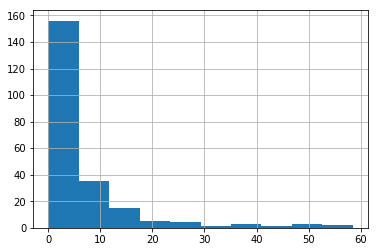

In [10]:
# Check distribution of population data
pop2010['2010'].hist()
plt.show()

## Total Population Counts by Country
Source: https://data.worldbank.org/indicator/SP.POP.TOTL?most_recent_year_desc=true

In [11]:
# Import the total population counts for each country and isolate the values pertaining to 2010
pop_country = pd.read_csv('population_data.csv', header=2)
pop_country = pop_country[['Country Name', '2010']]
pop_country.head()

,Country Name,2010
0,Aruba,101669.0
1,Afghanistan,29185507.0
2,Angola,23356246.0
3,Albania,2913021.0
4,Andorra,84449.0


In [12]:
# format column names to aid in merging
pop2010.columns = ['country', 'percent_under_5m']
pop_country.columns = ['country', 'total_pop']

# Combine population under 5m elevation and total population count data
pop_join = pop2010.merge(pop_country, how='inner', left_on='country', right_on='country')
pop_join.head()

,country,percent_under_5m,total_pop
0,Aruba,7.069167,101669.0
1,Angola,1.436094,23356246.0
2,Albania,7.070961,2913021.0
3,Arab World,7.720003,354890042.0
4,United Arab Emirates,14.784636,8549988.0


In [13]:
# Calculate how many people are living below 5m elevation of percent and total population data
def total_from_percent (country):
    '''Helper function to calculate the count of people living at an elevation less than or equal to 5m above sea
    level. Uses the percentage of the population living at or below 5m elevation in 2010 and total population for 
    each country.
    
    country: name of the country for which to perform the calculation; string
    
    returns the number (float) of people living at or below 5m elevation for each country'''
    
    # Isolate the percentage of the population living at or below 5m elevation for a country
    perc = pop_join.loc[pop_join.country == country]['percent_under_5m'].item()
    
    # Isolate the total population for a country
    tot = pop_join.loc[pop_join.country == country]['total_pop'].item()
    
    # Convert percentage of people living at or below 5m elevation to the number of people based on country's total
    # population
    total = (perc/100) * tot
    
    # Return the number of people living at or below 5m elevation
    return total

# Create a column to hold the data indicating how many people are living at or below 5m elevation for each country
pop_join['total_under_5m'] = pop_join.country.map(total_from_percent)
pop_join.head()

,country,percent_under_5m,total_pop,total_under_5m
0,Aruba,7.069167,101669.0,7.187151e+03
1,Angola,1.436094,23356246.0,3.354177e+05
2,Albania,7.070961,2913021.0,2.059786e+05
3,Arab World,7.720003,354890042.0,2.739752e+07
4,United Arab Emirates,14.784636,8549988.0,1.264085e+06


**NOTE:** To add a more detail to the forecasting application, assume that the total number of people living at or below 5m elevation in each country are distributed uniformly across the evaluated area. Then, calculate how many people are living at or below each 10cm increment of elevation based on what percentage of 5m the elevation increment encompasses.

In [17]:
# Helper function to perform the incremental elevation calculations
def population_by_elevation (country, elevation):
    '''Helper function to calculate how many people are living at each 10 cm increment of elevation in each country.
    
    country: country for which to perform the calculation; string
    elevation: value of elevation in meters; float
    
    returns the total number of people living at or below the indicated elevation increment'''
    
    # Isolate the data for the indicated country
    country_df = pop_join.loc[pop_join.country == country]
    
    # Get the number of people living at or below 5m elevation
    pop = country_df.total_under_5m.item()
    
    # Calculate the number of people living at or below the elevation increment
    pop_elev = (float(elevation)/float(5)) * pop
    
    # Return the number of people living at or below the elevation increment
    return pop_elev

In [18]:
# Helper function to create list of population data 
def create_pop_elev_col(elev):
    '''Helper function to create a list of population counts at elevation increments for each country.
    
    elev: elevation increment to feed into "elevation" parameter for population_by_elevation function; float
    
    returns a list of population counts for the elevation increment in the order of the countries in the pop_join df
    '''
    
    # Create a list to hold population counts
    pop_at_elev = []
    
    # Loop through the countries in the pop_join df
    for cnt in pop_join.country.unique():
        
        # Use the population_by_elevation function to calculate the number of people living at or below the elevation
        # increment
        pop_at_elev.append(population_by_elevation(cnt, elev))
        
    # Return the list of population counts
    return pop_at_elev

In [19]:
pop_join['total_10cm'] = create_pop_elev_col(0.1)
pop_join['total_20cm'] = create_pop_elev_col(0.2)
pop_join['total_30cm'] = create_pop_elev_col(0.3)
pop_join['total_40cm'] = create_pop_elev_col(0.4)
pop_join['total_50cm'] = create_pop_elev_col(0.5)
pop_join['total_60cm'] = create_pop_elev_col(0.6)
pop_join['total_70cm'] = create_pop_elev_col(0.7)
pop_join['total_80cm'] = create_pop_elev_col(0.8)
pop_join['total_90cm'] = create_pop_elev_col(0.9)
pop_join['total_100cm'] = create_pop_elev_col(1)
pop_join['total_110cm'] = create_pop_elev_col(1.1)
pop_join['total_120cm'] = create_pop_elev_col(1.2)
pop_join['total_130cm'] = create_pop_elev_col(1.3)
pop_join['total_140cm'] = create_pop_elev_col(1.4)
pop_join['total_150cm'] = create_pop_elev_col(1.5)
pop_join['total_160cm'] = create_pop_elev_col(1.6)
pop_join['total_170cm'] = create_pop_elev_col(1.7)
pop_join['total_180cm'] = create_pop_elev_col(1.8)
pop_join['total_190cm'] = create_pop_elev_col(1.9)
pop_join['total_200cm'] = create_pop_elev_col(2)

pop_join.head()

,country,percent_under_5m,total_pop,total_under_5m,total_10cm,total_20cm,total_30cm,total_40cm,total_50cm,total_60cm,...,total_110cm,total_120cm,total_130cm,total_140cm,total_150cm,total_160cm,total_170cm,total_180cm,total_190cm,total_200cm
0,Aruba,7.069167,101669.0,7.187151e+03,143.743019,2.874860e+02,4.312291e+02,5.749721e+02,7.187151e+02,8.624581e+02,...,1.581173e+03,1.724916e+03,1.868659e+03,2.012402e+03,2.156145e+03,2.299888e+03,2.443631e+03,2.587374e+03,2.731117e+03,2.874860e+03
1,Angola,1.436094,23356246.0,3.354177e+05,6708.354668,1.341671e+04,2.012506e+04,2.683342e+04,3.354177e+04,4.025013e+04,...,7.379190e+04,8.050026e+04,8.720861e+04,9.391697e+04,1.006253e+05,1.073337e+05,1.140420e+05,1.207504e+05,1.274587e+05,1.341671e+05
2,Albania,7.070961,2913021.0,2.059786e+05,4119.571394,8.239143e+03,1.235871e+04,1.647829e+04,2.059786e+04,2.471743e+04,...,4.531529e+04,4.943486e+04,5.355443e+04,5.767400e+04,6.179357e+04,6.591314e+04,7.003271e+04,7.415229e+04,7.827186e+04,8.239143e+04
3,Arab World,7.720003,354890042.0,2.739752e+07,547950.438477,1.095901e+06,1.643851e+06,2.191802e+06,2.739752e+06,3.287703e+06,...,6.027455e+06,6.575405e+06,7.123356e+06,7.671306e+06,8.219257e+06,8.767207e+06,9.315157e+06,9.863108e+06,1.041106e+07,1.095901e+07
4,United Arab Emirates,14.784636,8549988.0,1.264085e+06,25281.692893,5.056339e+04,7.584508e+04,1.011268e+05,1.264085e+05,1.516902e+05,...,2.780986e+05,3.033803e+05,3.286620e+05,3.539437e+05,3.792254e+05,4.045071e+05,4.297888e+05,4.550705e+05,4.803522e+05,5.056339e+05


**NOTE:** The current dataframe contains all countries with portions of their population living at or below an elevation of 5m. While rising sea levels will eventually affect inland countries, they are not under the most immediate threat. Thus, only the countries with a coastline will be included in the app to determine haw many people will be displaced by rising sea levels.

Source:http://chartsbin.com/view/ofv

In [20]:
# Import the data for coastal countries
coast = pd.read_excel('coastlines.xlsx')
coast.head()

,Country,Coastline
1,Canada,202080.0
2,Indonesia,54716.0
3,Greenland,44087.0
4,Russia,37653.0
5,Philippines,36289.0


In [21]:
# Merge the population by elevation data with the coastal countries data along the "country" column to discard the
# countries without a coastline
coastline_pop = pop_join.merge(coast, how='inner', left_on='country', right_on='Country')

# drop redundant columns
coastline_pop = coastline_pop.drop(['Country', 'Coastline'], axis=1)
coastline_pop.head()

,country,percent_under_5m,total_pop,total_under_5m,total_10cm,total_20cm,total_30cm,total_40cm,total_50cm,total_60cm,...,total_110cm,total_120cm,total_130cm,total_140cm,total_150cm,total_160cm,total_170cm,total_180cm,total_190cm,total_200cm
0,Aruba,7.069167,101669.0,7.187151e+03,143.743019,287.486037,431.229056,574.972075,718.715093,862.458112,...,1581.173206,1724.916224,1868.659243,2012.402262,2156.145280,2299.888299,2443.631318,2587.374336,2731.117355,2874.860374
1,Angola,1.436094,23356246.0,3.354177e+05,6708.354668,13416.709335,20125.064003,26833.418671,33541.773338,40250.128006,...,73791.901344,80500.256012,87208.610679,93916.965347,100625.320015,107333.674682,114042.029350,120750.384018,127458.738685,134167.093353
2,Albania,7.070961,2913021.0,2.059786e+05,4119.571394,8239.142787,12358.714181,16478.285575,20597.856968,24717.428362,...,45315.285331,49434.856724,53554.428118,57673.999512,61793.570905,65913.142299,70032.713693,74152.285087,78271.856480,82391.427874
3,United Arab Emirates,14.784636,8549988.0,1.264085e+06,25281.692893,50563.385785,75845.078678,101126.771570,126408.464463,151690.157355,...,278098.621818,303380.314711,328662.007603,353943.700496,379225.393388,404507.086281,429788.779173,455070.472066,480352.164958,505633.857851
4,Argentina,3.028913,40788453.0,1.235447e+06,24708.932645,49417.865289,74126.797934,98835.730579,123544.663223,148253.595868,...,271798.259092,296507.191736,321216.124381,345925.057026,370633.989670,395342.922315,420051.854960,444760.787605,469469.720249,494178.652894


In [22]:
# Sanity check
print('Number of countries in population-by-elevation dataframe:', len(pop_join))
print('Number of countries in coastal-population-by-elevation dataframe:', len(coastline_pop))

Number of countries in population-by-elevation dataframe: 225
Number of countries in coastal-population-by-elevation dataframe: 147


In [82]:
# Save df to csv for app development
coastline_pop.to_csv('coastline_pop.csv', index=False)